# Stellar Health

## Website to create health related awareness caused due to various changes in enviornmental factors like Air Temperature, Land surface temperature, Ocean Temperature,Sunlight etc.

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

In [58]:
global_temp = pd.read_csv('GlobalTemperatures.csv')

In [60]:
global_temp.head()

dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0  1750-01-01                   3.034                              3.574   
1  1750-02-01                   3.083                              3.702   
2  1750-03-01                   5.626                              3.076   
3  1750-04-01                   8.490                              2.451   
4  1750-05-01                  11.573                              2.072   

   LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0                 NaN                            NaN                 NaN   
1                 NaN                            NaN                 NaN   
2                 NaN                            NaN                 NaN   
3                 NaN                            NaN                 NaN   
4                 NaN                            NaN                 NaN   

   LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
0                            NaN                             NaN   
1                            NaN                             NaN   
2                            NaN                             NaN   
3                            NaN                             NaN   
4                            NaN                             NaN   

   LandAndOceanAverageTemperatureUncertainty  
0                                        NaN  
1                                        NaN  
2                                        NaN  
3                                        NaN  
4                                        NaN

In [61]:
global_temp = global_temp[['dt', 'LandAverageTemperature']]

global_temp['dt'] = pd.to_datetime(global_temp['dt'])
global_temp['year'] = global_temp['dt'].map(lambda x: x.year)
global_temp['month'] = global_temp['dt'].map(lambda x: x.month)

def get_season(month):
    if month >= 3 and month <= 5:
        return 'spring'
    elif month >= 6 and month <= 8:
        return 'summer'
    elif month >= 9 and month <= 11:
        return 'autumn'
    else:
        return 'winter'
    
min_year = global_temp['year'].min()
max_year = global_temp['year'].max()
years = range(min_year, max_year + 1)

global_temp['season'] = global_temp['month'].apply(get_season)

spring_temps = []
summer_temps = []
autumn_temps = []
winter_temps = []

for year in years:
    curr_years_data = global_temp[global_temp['year'] == year]
    spring_temps.append(curr_years_data[curr_years_data['season'] == 'spring']['LandAverageTemperature'].mean())
    summer_temps.append(curr_years_data[curr_years_data['season'] == 'summer']['LandAverageTemperature'].mean())
    autumn_temps.append(curr_years_data[curr_years_data['season'] == 'autumn']['LandAverageTemperature'].mean())
    winter_temps.append(curr_years_data[curr_years_data['season'] == 'winter']['LandAverageTemperature'].mean())

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

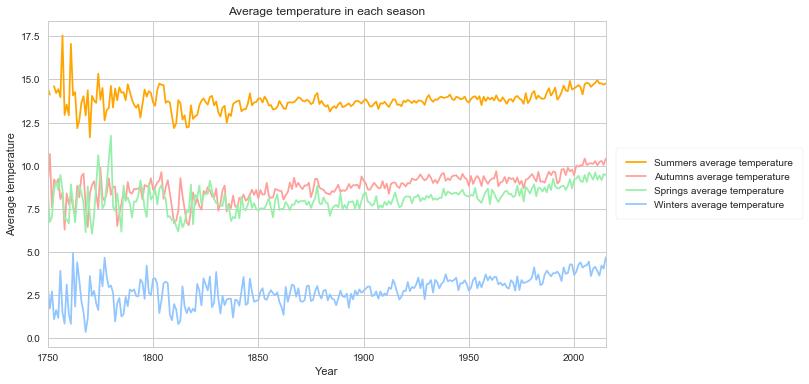

In [62]:
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
f, ax = plt.subplots(figsize=(10, 6))

plt.plot(years, summer_temps, label='Summers average temperature', color='orange')
plt.plot(years, autumn_temps, label='Autumns average temperature', color='r')
plt.plot(years, spring_temps, label='Springs average temperature', color='g')
plt.plot(years, winter_temps, label='Winters average temperature', color='b')

plt.xlim(min_year, max_year)

ax.set_ylabel('Average temperature')
ax.set_xlabel('Year')
ax.set_title('Average temperature in each season')
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, borderpad=1, borderaxespad=1)

In [189]:
#Let's remove the duplicated countries (in the analysis, we don't consider the presence of 
#colonies at this the countries) and countries for which no information about the temperature

global_temp_country = pd.read_csv('GlobalLandTemperaturesByCountry.csv')

global_temp_country_clear = global_temp_country[~global_temp_country['Country'].isin(
    ['Denmark', 'Antarctica', 'France', 'Europe', 'Netherlands',
     'United Kingdom', 'Africa', 'South America'])]

global_temp_country_clear = global_temp_country_clear.replace(
   ['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)'],
   ['Denmark', 'France', 'Netherlands', 'United Kingdom'])

#Let's average temperature for each country

countries = np.unique(global_temp_country_clear['Country'])
mean_temp = []
for country in countries:
    mean_temp.append(global_temp_country_clear[global_temp_country_clear['Country'] == 
                                               country]['AverageTemperature'].mean())


    
data = [ dict(
        type = 'choropleth',
        locations = countries,
        z = mean_temp,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = '# Average\nTemperature,\n°C')
            )
       ]

layout = dict(
    title = 'Average land temperature in countries',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(103, 103, 103)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')

In [176]:
df_heat_2016 = pd.read_csv('heat_stress_2016.csv')

In [182]:
df_heat_2016

stateFIPS        State  Year  Value  Stability  Unnamed: 5
0          4      Arizona  2016    527          1         NaN
1          9  Connecticut  2016     45          1         NaN
2         12      Florida  2016  1,112          1         NaN
3         21     Kentucky  2016    180          1         NaN
4         23        Maine  2016      6          1         NaN
5         34   New Jersey  2016    171          1         NaN
6         35   New Mexico  2016     38          1         NaN
7         36     New York  2016    276          1         NaN
8         41       Oregon  2016     49          1         NaN

In [183]:
frames = [df_temp, df_heat_2016]
result = pd.concat(frames)

# Feature Engineering 

In [184]:
df_heatstress = pd.read_csv('heat_stress.csv', index_col= 0)

df_filter = df_heatstress.drop(['Unnamed: 5','Stability', 'Notes_x','State Code_x','Year Code_x','Notes_y','State Code_y','Year Code_y'], axis=1)
df_filter2 = df_filter.dropna()

In [185]:
df_filter2.Year.value_counts()

2010    28
2009    28
2008    28
2007    28
2006    28
2005    28
2011    27
2004    27
2003    26
2002    26
2001    26
2000    23
Name: Year, dtype: int64

# Dropping missing values 

In [186]:
df_filter2.head()

stateFIPS        State  Year  Value  Avg Daily Max Air Temperature (F)  \
0          6   California  2000    625                              69.24   
1          9  Connecticut  2000     14                              56.10   
2         12      Florida  2000    278                              80.41   
3         19         Iowa  2000     47                              60.15   
4         20       Kansas  2000    139                              68.28   

   Avg Daily Sunlight (KJ/m?  
0                   19138.07  
1                   14490.93  
2                   19391.91  
3                   14760.27  
4                   16661.36

In [187]:
df_filter2[df_filter2['State']=='California']

stateFIPS       State  Year  Value  Avg Daily Max Air Temperature (F)  \
0            6  California  2000    625                              69.24   
23           6  California  2001    356                              69.97   
49           6  California  2002    400                              69.66   
75           6  California  2003    518                              70.02   
101          6  California  2004    355                              69.57   
129          6  California  2005    495                              68.70   
157          6  California  2006   1100                              69.13   
185          6  California  2007    571                              69.80   
213          6  California  2008    571                              69.66   
241          6  California  2009    516                              69.82   
269          6  California  2010    503                              67.74   
297          6  California  2011    416                              67.43   

     Avg Daily Sunlight (KJ/m?  
0                     19138.07  
23                    19332.97  
49                    19678.21  
75                    19342.63  
101                   19791.89  
129                   19181.27  
157                   19195.91  
185                   19698.04  
213                   19842.65  
241                   19663.69  
269                   19255.82  
297                   19438.55

# Feature and Target 

In [136]:
X= df_filter2[['Avg Daily Max Air Temperature (F)','Avg Daily Sunlight (KJ/m?']]
Y= df_filter2[['Value']]

# Standarizing the data

In [142]:
from sklearn import preprocessing
standardized_X = preprocessing.scale(X)

# Train Test Split

In [143]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(standardized_X, Y, test_size=0.3, random_state=0)

print('There are {} samples in the training set and {} samples in the test set'.format(
X_train.shape[0], X_test.shape[0]))

There are 226 samples in the training set and 97 samples in the test set


# Random Forest algorithm

In [144]:
from sklearn.ensemble import RandomForestRegressor
ran_reg = RandomForestRegressor(max_depth=2, random_state=0,n_estimators=500)
ran_reg.fit(X_train,y_train)
y_pred = ran_reg.predict(X_test)

In [173]:
y_pred

array([102.89563817, 103.03240539, 118.16521669, 455.30392568,
       102.89563817,  45.91747082, 462.21086521, 253.90835858,
       116.4319167 , 103.92148721, 461.61109213,  74.56848547,
        99.20526448, 118.3167096 , 102.89563817, 125.09921783,
       104.07693039, 104.07693039, 118.09620749, 232.21984106,
       461.86526521, 222.68235596, 107.32689639, 434.7163967 ,
       225.88324532, 102.89563817, 230.47994804, 467.24707099,
       107.32689639, 295.16216261, 114.81058614, 230.47994804,
        91.57017642, 184.67260771, 102.89563817, 461.86526521,
       223.25127221, 104.07693039, 223.10426073, 104.07693039,
       102.89563817, 116.96469903, 223.10426073,  45.91747082,
       254.47727483, 117.67304978, 439.58858792, 102.89563817,
       118.3833564 , 299.51315409, 252.81640614, 118.10136971,
        71.61751912, 104.05825444, 104.07693039, 118.80799781,
       117.67132713,  49.39356869, 103.92148721,  80.39717226,
       103.03240539, 102.89563817,  71.0923876 , 103.03

# Model Evaluation 

In [149]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred, y_test)

14518.162508537906

In [150]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.37621183753192133